In [1]:
from my_library.algorithms.gmm import gmm

In [2]:
gm = gmm.GMM('csv_hcb_member_profiling_preprocessed.csv')

In [3]:
gm.get_shape()

(10000, 55)

In [8]:
a, b, c = gm.randomizedSearchCV_gmm(
    {'n_components': list(range(2, 11)), 'covariance_type': ['full', 'tied', 'diag', 'spherical'],
     'init_params': ['kmeans', 'random']}, cv=5, n_iter=10, rand_sample_prop=0.2)

In [9]:
n_components = b['n_components']
covariance_type = b['covariance_type']
init_params = b['init_params']

In [10]:
gm.get_training_history(c)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,param_init_params,param_covariance_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.601102,0.567225,0.168801,0.150023,9,random,full,"{'n_components': 9, 'init_params': 'random', '...",-0.271009,-0.216932,-0.257891,-0.235159,-0.238591,-0.243916,0.018775,10
1,0.062446,0.008418,0.056416,0.022598,6,kmeans,tied,"{'n_components': 6, 'init_params': 'kmeans', '...",0.443927,0.449527,0.423769,0.262921,0.443927,0.404814,0.071487,4
2,0.276861,0.108860,0.107074,0.108769,10,kmeans,full,"{'n_components': 10, 'init_params': 'kmeans', ...",0.543451,0.565966,0.522498,0.500384,0.532820,0.533024,0.021772,3
3,0.509245,0.173972,0.100632,0.040379,8,random,full,"{'n_components': 8, 'init_params': 'random', '...",-0.226226,-0.203148,-0.196533,-0.201821,-0.216285,-0.208803,0.010870,8
4,0.027158,0.014360,0.011311,0.001461,3,random,spherical,"{'n_components': 3, 'init_params': 'random', '...",0.595878,0.598528,0.599331,0.598190,0.586721,0.595730,0.004648,1
5,0.034565,0.004498,0.027045,0.004484,4,kmeans,tied,"{'n_components': 4, 'init_params': 'kmeans', '...",0.571468,0.526401,0.529082,0.499116,0.571847,0.539583,0.028211,2
6,0.035872,0.009022,0.014627,0.000494,7,kmeans,diag,"{'n_components': 7, 'init_params': 'kmeans', '...",-0.089526,-0.201439,0.306980,-0.151132,-0.113711,-0.049766,0.182328,7
7,0.343927,0.083534,0.065836,0.012971,10,random,full,"{'n_components': 10, 'init_params': 'random', ...",-0.253451,-0.166021,-0.223293,-0.213375,-0.228725,-0.216973,0.028698,9
8,0.141399,0.029473,0.048000,0.013770,10,kmeans,tied,"{'n_components': 10, 'init_params': 'kmeans', ...",0.147232,0.440672,0.367269,0.498442,0.464272,0.383578,0.125770,5
9,0.011744,0.001103,0.009536,0.000465,2,kmeans,diag,"{'n_components': 2, 'init_params': 'kmeans', '...",0.194410,0.070055,0.070710,0.061235,0.180877,0.115457,0.059190,6


In [11]:
print('recommended parameters:', n_components, covariance_type, init_params)

recommended parameters: 3 spherical random


In [12]:
clusters = gm.gmm(n_components, covariance_type, init_params, 0.3)

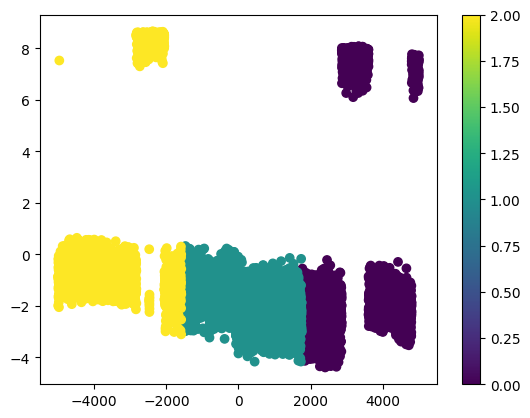

In [13]:
gm.scatter_plot(gm.pca(clusters))

In [14]:
gm.get_davies_bouldin_score(clusters)

0.5000597196989586

In [15]:
gm.get_silhouette_score(clusters)

0.5899149515881053

In [16]:
gm.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,1622.5,0.279229,-0.032324,0.148971,-0.196258,0.539355,-0.006399,0.560228,0.109098,0.485846,-0.066099,0.023909,0.182381,0.118687,0.202999,-0.119837,0.123441,0.245331,-0.041653,-0.669381,0.924538,0.043027,0.317480,0.197027,-0.042917,0.264066,-0.153307,0.317480,0.317480,0.317480,-0.023448,-0.144238,-0.020385,0.317480,0.548454,-0.024871,-0.005658,0.317480,0.213367,0.186885,0.317480,-0.036280,0.317480,0.317480,0.317480,0.317480,0.161232,0.037588,-0.096824,0.023220,0.015221,-0.037747,0.048832,-0.019276,-0.020113,0
1,4915.0,-0.022572,-0.036725,0.055849,-0.443075,0.100567,-0.050357,-0.034734,0.015414,0.492048,-0.169112,0.120840,0.028529,-0.044062,0.039686,-0.190800,-0.014377,-0.070247,0.201177,0.419609,-0.071237,-0.010491,-0.453371,0.307662,0.203350,-0.360367,0.258661,-0.453371,-0.453371,-0.453371,-0.030650,0.162326,0.413036,-0.453371,-0.260617,0.279065,0.372119,-0.453371,0.307623,-0.206429,-0.453371,0.091802,-0.453371,-0.453371,-0.453371,-0.453371,0.110025,-0.159206,0.055314,-0.008314,0.025140,-0.014238,-0.017233,-0.321421,0.412593,1
2,8292.0,-0.243341,0.066632,-0.196205,0.619760,-0.610993,0.055319,-0.498543,-0.118769,-0.942900,0.228176,-0.140877,-0.201250,-0.069731,-0.231756,0.300460,-0.103275,-0.164506,-0.157108,0.225984,-0.809133,-0.030640,0.141513,-0.488092,-0.158031,0.101349,-0.107184,0.141513,0.141513,0.141513,0.052256,-0.021613,-0.384467,0.141513,-0.266496,-0.249214,-0.358460,0.141513,-0.503585,0.024198,0.141513,-0.055274,0.141513,0.141513,0.141513,0.141513,-0.260829,0.119935,0.037950,-0.013942,-0.039048,0.049800,-0.029566,0.332590,-0.384293,2


In [18]:
gm.get_cluster_distribution(clusters)

,cluster,count,percentage
0,0,3246,32.46
1,1,3339,33.39
2,2,3415,34.15


In [19]:
gm.get_scores(clusters)

,silhouette_score,davies_bouldin_score
0,0.589915,0.50006
